<a href="https://colab.research.google.com/github/MeAmarP/yolo-on-OID/blob/master/OID_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/harshilpatel312/open-images-downloader.git

Cloning into 'open-images-downloader'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Unpacking objects: 100% (36/36), done.


In [4]:
!python /content/open-images-downloader/downloader/download.py --images=/content/train-images-boxable.csv --annots=/content/train-annotations-bbox.csv --objects Helmet Handgun --dir=/content/img_data --labelmap=/content/class-descriptions-boxable.csv



Generating download list for the following objects:  ['bicycle helmet', 'football helmet', 'handgun', 'helmet']

Download %:   0% 0/44886 [00:00<?, ?it/s]
Download %:   0% 1/44886 [00:00<3:06:00,  4.02it/s]
Download %:   0% 20/44886 [00:00<2:11:46,  5.67it/s]
Download %:   0% 25/44886 [00:00<1:37:24,  7.68it/s]
Download %:   0% 40/44886 [00:00<1:10:08, 10.66it/s]
Download %:   0% 47/44886 [00:00<52:39, 14.19it/s]  
Download %:   0% 60/44886 [00:00<39:10, 19.07it/s]
Download %:   0% 74/44886 [00:01<29:44, 25.11it/s]
Download %:   0% 83/44886 [00:01<24:11, 30.86it/s]
Download %:   0% 100/44886 [00:01<18:22, 40.62it/s]
Download %:   0% 110/44886 [00:01<16:44, 44.60it/s]
Download %:   0% 122/44886 [00:01<14:26, 51.69it/s]
Download %:   0% 139/44886 [00:01<11:25, 65.26it/s]
Download %:   0% 151/44886 [00:01<11:28, 64.99it/s]
Download %:   0% 163/44886 [00:01<10:13, 72.84it/s]
Download %:   0% 173/44886 [00:02<09:24, 79.22it/s]
Download %:   0% 183/44886 [00:02<10:08, 73.42it/s]
Download %:

In [2]:
# get the training data
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv

# get the test data
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-annotations-bbox.csv
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-images.csv

#get labelmap
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/class-descriptions-boxable.csv

--2020-01-13 09:13:51--  https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv
Resolving requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)... 52.72.141.227, 18.212.0.107, 54.84.130.10
Connecting to requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)|52.72.141.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216137230 (206M) [text/csv]
Saving to: ‘train-images-boxable.csv’

train-images-boxabl 100%[===================>] 206.12M  98.0MB/s    in 2.1s    

2020-01-13 09:13:53 (98.0 MB/s) - ‘train-images-boxable.csv’ saved [216137230/216137230]

--2020-01-13 09:13:58--  https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv
Resolving requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)... 52.72.141.227, 18.212.0.107, 54.84.130.10
Connecting to requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)|52.72.141.22

In [6]:
import os
len(os.listdir("/content/img_data"))

15251

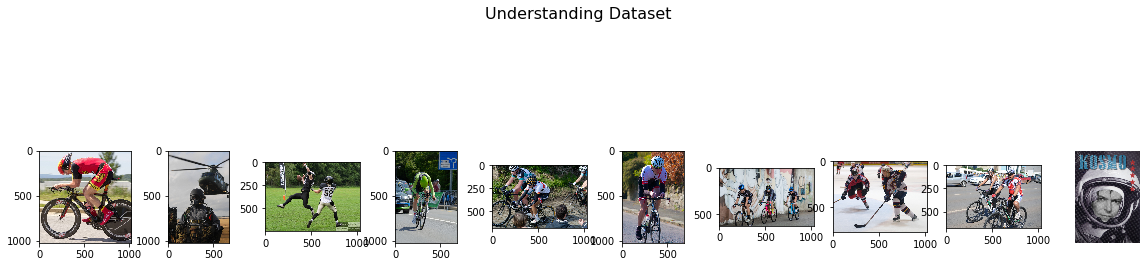

In [16]:
def displaySampleImages(PATH_TO_DIR,Nb_of_Img2Disp=None):
    """
    Display grid of sample images for every class in dataset.
    
    Args:
        PATH_TO_DIR(str): path to train or test dir.        
    """
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['axes.titlesize'] = 8
    import glob
    import cv2
    #NoOfClasses = len(ALL_CLASS_NAMES)   
    fig = plt.figure(figsize=(20,20))
    # fig.subplots_adjust(hspace=0.7, wspace=0.1)
    fig.suptitle('Understanding Dataset', fontsize=16)
    for n,path in enumerate(glob.glob(PATH_TO_DIR+'/*.jpg')[:Nb_of_Img2Disp]):
      #print(ImagePath)
      Img = cv2.imread(path)
      ax = fig.add_subplot(10,10,(n+1))
      plt.imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return

displaySampleImages("/content/img_data",Nb_of_Img2Disp=10)



In [0]:
import pandas as pd
path_to_train_img_csv = "/content/train-images-boxable.csv"
path_to_train_imganno_csv = "/content/train-annotations-bbox.csv"
path_to_classmap_csv = "/content/class-descriptions-boxable.csv" 

imgdata_df = pd.read_csv(path_to_train_img_csv)
imganno_df = pd.read_csv(path_to_train_imganno_csv)
  

In [59]:
print(imganno_df.head())
print("imganno_df.shape:",imganno_df.shape)
print(imgdata_df.head())
print("imgdata_df.shape:",imgdata_df.shape)

            ImageID  Source  LabelName  ...  IsGroupOf  IsDepiction  IsInside
0  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
1  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
2  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
3  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
4  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0

[5 rows x 13 columns]
imganno_df.shape: (14610229, 13)
             image_name                                          image_url
0  e39871fd9fd74f55.jpg  https://requestor-proxy.figure-eight.com/figur...
1  f18b91585c4d3f3e.jpg  https://requestor-proxy.figure-eight.com/figur...
2  ede6e66b2fb59aab.jpg  https://requestor-proxy.figure-eight.com/figur...
3  ed600d57fcee4f94.jpg  https://requestor-proxy.figure-eight.com/figur...
4  ff47e649b23f446d.jpg  https://requestor-proxy.figure-eight.com/figur...
imgdata_df.shape: (1743042

In [0]:
del imgdata_df

In [45]:
labelmap_df = pd.read_csv(path_to_classmap_csv,names=['classid','classname']) 
labelmap_df.head()

,classid,classname
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [0]:
#===============================================================================
### DEPRECATED: To save each of the bbox details in .txt file
#===============================================================================
# from tqdm import tqdm
# for imgid in tqdm(train_helmet_anno_df.ImageID.unique()):
#   df=train_helmet_anno_df.loc[train_helmet_anno_df.ImageID == imgid ]
#   df=df[['imgclass','XMin', 'XMax', 'YMin','YMax']]
#   path_to_save = '/content/helmet_anno_files/'+imgid+'.txt'
#   df.to_csv(path_to_save, header=None, index=None, sep=' ')

# #check no of file generated
# import os
# len(os.listdir('/content/helmet_anno_files'))

#===============================================================================
### DEPRECATED: To move image and .txt files together ina single dir
#===============================================================================
# from tqdm import tqdm
# import shutil

# path_src_dir = '/content/drive/My Drive/train/'
# path_dst_dir = '/content/helmet_img_files/'
# file_extn = '.jpg'

# for imgid in tqdm(train_helmet_anno_df.ImageID.unique()):
#   shutil.move(path_src_dir+imgid+file_extn, path_dst_dir+imgid+file_extn)

# import os
# len(os.listdir('/content/helmet_img_files'))

In [133]:
#===============================================================================
### ACTIVE: To Get Helmet CLass specific data
#===============================================================================
classid = labelmap_df[labelmap_df.classname == 'Helmet'].classid
print("ClassID for Helmet Class:",classid)
train_helmet_anno_df = imganno_df.loc[imganno_df.LabelName == '/m/0zvk5']
train_helmet_anno_df['imgclass'] = 0
train_helmet_anno_df=train_helmet_anno_df.reset_index(drop=True)
print(train_helmet_anno_df.head())


#Print no of unique image ids
print("Count of ImageId:", train_helmet_anno_df.ImageID.nunique())
print("dframe Size", train_helmet_anno_df.shape)
print("Column Names:",train_helmet_anno_df.columns)
print("\n\n")

ClassID for Helmet Class: 600    /m/0zvk5
Name: classid, dtype: object
            ImageID  Source LabelName  ...  IsDepiction  IsInside  imgclass
0  00001bcc92282a38  xclick  /m/0zvk5  ...            0         0         0
1  000023aa04ab09ed  xclick  /m/0zvk5  ...            0         0         0
2  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0
3  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0
4  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0

[5 rows x 14 columns]
Count of ImageId: 7608
dframe Size (16502, 14)
Column Names: Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'imgclass'],
      dtype='object')





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
#ImageID of Image files in a local dir for Class "Helmet"
imgdirids = [imgid.split('.')[0] for imgid in os.listdir("/content/img_data")]
# len(set(train_helmet_anno_df.ImageID.unique()).intersection(set(imgdirids)))

In [0]:
# Write routine to display labelled objects in training image dataset
# This is just to understand and check how to normalize-dnormalize bbox values

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/img_data/00001bcc92282a38.jpg")
h,w,_ = img.shape

for _,row in train_helmet_anno_df[train_helmet_anno_df.ImageID == "00001bcc92282a38"].iterrows():
  ## print(row[['YMin', 'XMin', 'YMax', 'XMax']].values.tolist())
  pxl_xmin = int(row['XMin']*w)
  pxl_xmax = int(row['XMax']*w)
  pxl_ymin = int(row['YMin']*h)
  pxl_ymax = int(row['YMax']*h)
  img = cv2.rectangle(img,(pxl_xmin,pxl_ymin),(pxl_xmax,pxl_ymax),(0,255,0),2)
cv2_imshow(img)

In [137]:
# Add .jpg to ImageID
# train_helmet_anno_df['ImageID'] = train_helmet_anno_df['ImageID']+'.jpg'

#keep relevent columns only remove others
select_cols = ['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin','YMax','imgclass']
train_helmet_anno_df = train_helmet_anno_df[select_cols]

bbox_cx = 
bbox_cy = 
bbox_w = 
bbox_h = 

print(train_helmet_anno_df.head())

                ImageID LabelName      XMin  ...      YMin      YMax  imgclass
0  00001bcc92282a38.jpg  /m/0zvk5  0.181875  ...  0.085366  0.452158         0
1  000023aa04ab09ed.jpg  /m/0zvk5  0.272727  ...  0.000000  0.263462         0
2  000134de87dd044b.jpg  /m/0zvk5  0.003125  ...  0.000000  0.128518         0
3  000134de87dd044b.jpg  /m/0zvk5  0.200625  ...  0.000000  0.120075         0
4  000134de87dd044b.jpg  /m/0zvk5  0.623125  ...  0.365854  0.461538         0

[5 rows x 7 columns]
